# A Simple fully connected network to fit a given function

https://colab.research.google.com/drive/1BDkEwabD60Ho3RvILGct-cvIjKt7K526

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [0]:
# some matplotlib options
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = 1.0  
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['axes.titlesize'] = 'x-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large'
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['axes.labelcolor'] = 'black'
 
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.labelsize'] = 'x-large'

 
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.labelsize'] = 'x-large'

In [0]:
# define the function to fit and the range
fitting_func = lambda x: np.sin(2*np.pi*x)
x_min = 0.0
x_max = 1.0

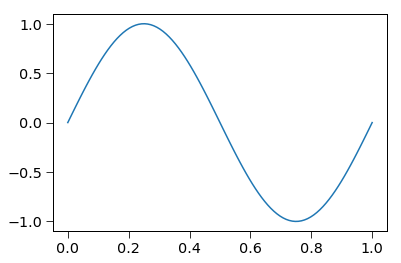

In [4]:
# plot the function
x_plot = np.linspace(x_min, x_max, 100)
f_plot = fitting_func(x_plot)

plt.plot(x_plot, f_plot)

# The Network

In [0]:
# create train and test data
N_train = 32

np.random.seed(32)
# training data is chosen randomly
x_train = np.random.uniform(low=x_min, high=x_max, size=[N_train, 1])
f_train = fitting_func(x_train)

# test data is uniform
x_test = x_plot.copy()
f_test = f_plot.copy()

In [0]:
# defualt params
default_epochs = 500 # number of iterations through the training set
default_batch_size = 8 # number of samples per optimization step
default_activation = tf.nn.tanh # non-linear activation after each layer, try: tf.nn.relu, tf.nn.elu 
default_optimizer = tf.keras.optimizers.Adam(lr=1e-3) # the optimization algorithm

In [7]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation=default_activation),
  tf.keras.layers.Dense(32, activation=default_activation),
  tf.keras.layers.Dense(32, activation=default_activation),
  tf.keras.layers.Dense(32, activation=default_activation),
  tf.keras.layers.Dense(1, activation=None)
])
model.compile(optimizer=default_optimizer, loss='mean_squared_error')

# train
model.fit(x_train, f_train, epochs=default_epochs, verbose=0, batch_size=default_batch_size)

# evaluate
test_loss = model.evaluate(x_test, f_test)
test_pred = model.predict(x_test)
print("Test Loss: ", test_loss)

W0805 10:54:42.967451 139779803826048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


100/100 [==============================] - 0s 349us/sample - loss: 7.8017e-04
Test Loss:  0.0007801738614216447


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  64        
_________________________________________________________________
dense_1 (Dense)              multiple                  1056      
_________________________________________________________________
dense_2 (Dense)              multiple                  1056      
_________________________________________________________________
dense_3 (Dense)              multiple                  1056      
_________________________________________________________________
dense_4 (Dense)              multiple                  33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'Loss')

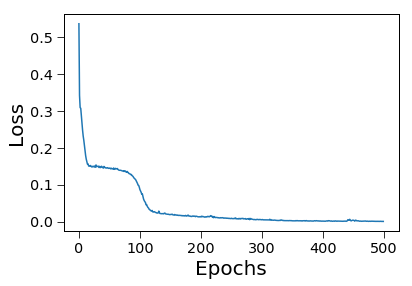

In [9]:
plt.plot(model.history.history['loss'])

plt.xlabel("Epochs", size=20)
plt.ylabel("Loss", size=20)

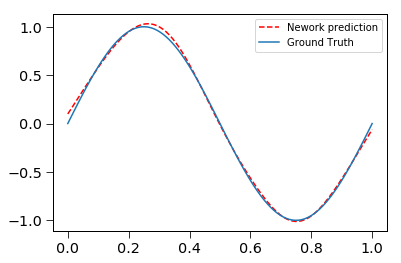

In [10]:
# plot the function
plt.plot(x_test, test_pred, 'r--', label="Nework prediction")
plt.plot(x_plot, f_plot, label="Ground Truth")
plt.legend()

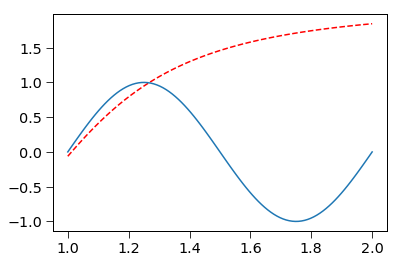

In [11]:
# extrapolation
test_pred = model.predict(x_test + 1)
plt.plot(x_test + 1, test_pred, 'r--')
plt.plot(x_plot + 1, fitting_func(x_plot + 1))


# Let's explore some hyper parameters



###  batch size

In [12]:
test_losses = []
for batch_size in 2**np.arange(1,6):
    # build the model
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(1, activation=None)
          ])
    model.compile(optimizer=default_optimizer, loss='mean_squared_error')
    model.fit(x_train, f_train, epochs=default_epochs, verbose=0, batch_size=batch_size)

    test_losses.append(model.evaluate(x_test, f_test))

100/100 [==============================] - 0s 1ms/sample - loss: 5.4102e-04


Text(0, 0.5, 'Loss')

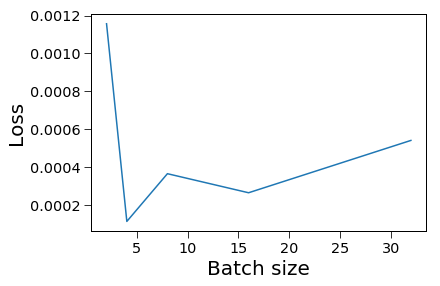

In [13]:
plt.plot(2**np.arange(1,6), test_losses)
plt.xlabel("Batch size", size=20)
plt.ylabel("Loss", size=20)


### Number of Layers

In [14]:
test_losses = []
for i in range(2, 9):
    model = tf.keras.models.Sequential([
                *[tf.keras.layers.Dense(32, activation=default_activation) for j in range(i)],
                tf.keras.layers.Dense(1, activation=None)
              ])
    model.compile(optimizer='Adam', loss='mean_squared_error')
    model.fit(x_train, f_train, epochs=default_epochs, verbose=0, batch_size=default_batch_size)

    test_losses.append(model.evaluate(x_test, f_test))

100/100 [==============================] - 0s 2ms/sample - loss: 5.1117e-04


Text(0, 0.5, 'Loss')

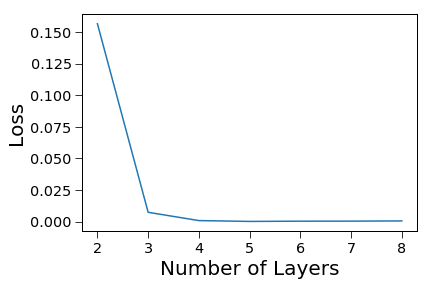

In [15]:
plt.plot(np.arange(2,9), test_losses)

plt.xlabel("Number of Layers", size=20)
plt.ylabel("Loss", size=20)

### Optimization stepsize

In [16]:
test_losses = []
for lr in 10**np.arange(-1, -4.5, -0.5):
    # build the model
    model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(32, activation=default_activation),
            tf.keras.layers.Dense(1, activation=None)
            ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr), loss='mean_squared_error')
    model.fit(x_train, f_train, epochs=default_epochs, verbose=0, batch_size=default_batch_size)

    test_losses.append(model.evaluate(x_test, f_test))

100/100 [==============================] - 0s 4ms/sample - loss: 0.2090


Text(0, 0.5, 'Loss')

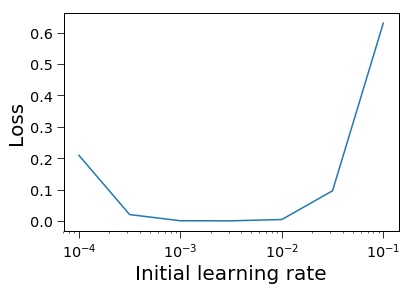

In [17]:
plt.semilogx(10**np.arange(-1, -4.5, -0.5), test_losses)

plt.xlabel("Initial learning rate", size=20)
plt.ylabel("Loss", size=20)